#  4.9  -  Intro to Data Visualization with Python - Task pt2

In [1]:
#  Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Paths to/from project folder

path_orig = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\02 Data\Original Data'
path_prep = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\02 Data\Prepared Data'
path_vis = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\04 Analysis\Visualizations'

In [5]:
#  Import dataset

instacart_merged = pd.read_pickle(os.path.join(path_prep, 'instacart_merged_4-9.pkl'))

In [6]:
instacart_merged.head(0)

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income


####  3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

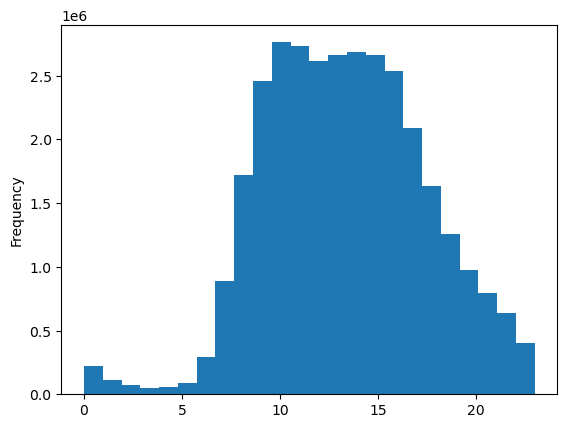

In [7]:
hist1_q3 = instacart_merged['hour_order_was_placed'].plot.hist(bins = 24)

OBSERVATION

The histogram shows that there are very few sales in the overnight hours through the early morning. Sales then increase dramatically and are at or near maximum for several hours from 9am through 4pm. Sales then decrease through the evening hours.

####  4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

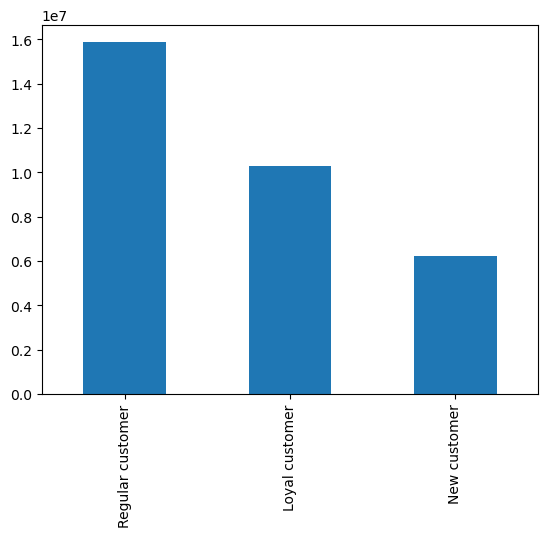

In [8]:
bar_q4 = instacart_merged['loyalty_flag'].value_counts().plot.bar()

####  5.  Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# Sample the data

# Set the seed for the random number generator.
# Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).

np.random.seed(4)
dev = np.random.rand(len(instacart_merged)) <= 0.5

In [10]:
# Split your dataframe into two samples

big = instacart_merged[dev]     # 70% of sample
small = instacart_merged[~dev]  # 30% of sample

In [11]:
len(instacart_merged)

32404859

In [12]:
# Verify small + big = original

len(big) + len(small)

32404859

In [13]:
# Create small df with only the two needed columns

df_small = small[['hour_order_was_placed', 'prices']]

In [14]:
df_small.shape

(16200324, 2)

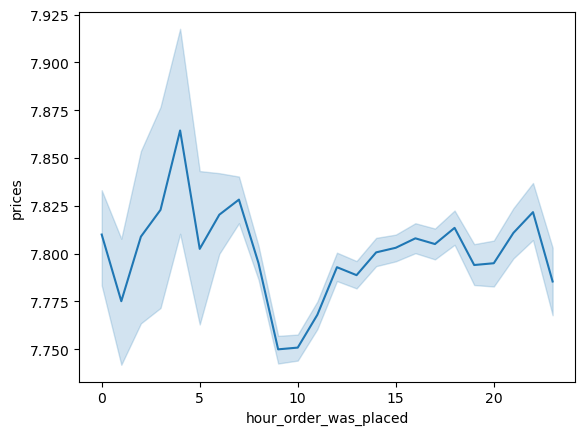

In [15]:
#Plot line chart

line_q5 = sns.lineplot(data = df_small, x = 'hour_order_was_placed',y = 'prices')#.set(title='Hour Order Was Placed vs. Average Price')

In [16]:
df_small.groupby(['hour_order_was_placed']).mean()

,prices
hour_order_was_placed,
0,7.809967
1,7.775109
2,7.808874
3,7.822863
4,7.864380
5,7.802469
6,7.820343
7,7.828230
8,7.794952


####  6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [17]:
# create another small df

df_small2 = small[['age', 'number_of_dependents']]

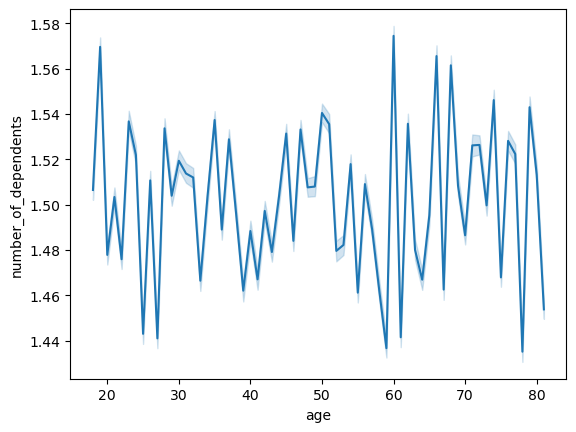

In [18]:
line_q6 = sns.lineplot(data = df_small2, x = 'age',y = 'number_of_dependents')

OBSERVATION

I don't believe a line chart is the best way to view this data. I have doubts about its accuracy. The mean appears to be somewhere around 1.5, but the min of 0 and max of 3 are not represented in the chart.

In [19]:
df_small2.number_of_dependents.describe()

count    1.620032e+07
mean     1.501765e+00
std      1.118866e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependents, dtype: float64

In [20]:
df_small2.number_of_dependents.value_counts()

3    4066238
0    4049017
2    4045303
1    4039766
Name: number_of_dependents, dtype: int64

In [21]:
df_small2.shape

(16200324, 2)

####  7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

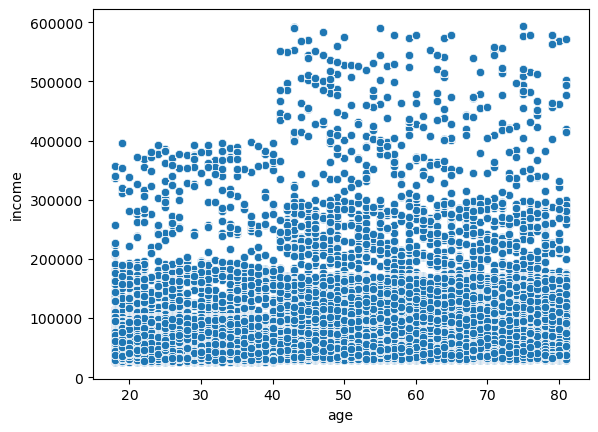

In [32]:
scat_age_income = sns.scatterplot(x = 'age', y = 'income',data = instacart_merged)#.set(title='Age vs. Income')

OBSERVATION

This scatter plot shows that older customers, specifically those over age 40, are likely to have higher incomes.

####  8.  Export your visualizations as “.png” files in your relevant project folder.

In [23]:
hist1_q3.figure.savefig(os.path.join(path_vis, 'hist_hour.png'))

In [24]:
bar_q4.figure.savefig(os.path.join(path_vis, 'bar_loyalty.png'))

In [25]:
line_q5.figure.savefig(os.path.join(path_vis, 'line_hourprices.png'))

In [26]:
line_q6.figure.savefig(os.path.join(path_vis, 'line_age_numberofdependants.png'))

In [33]:
scat_age_income.figure.savefig(os.path.join(path_vis, 'scatter_age_income.png'))

In [ ]:
#  Export df_customers_clean to Prepared folder in .pkl format  

#instacart_merged.to_pickle(os.path.join(path_prep, 'instacart_merged_4-9.pkl'))

#  NO CHANGES MADE TO THE FILE